<a href="https://colab.research.google.com/github/WestonMadeira1/HW_4/blob/main/HW4_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ML Data/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
X = housing.iloc[:, [1,2,3,4,5,6,7,8,9,10,11]].values
Y = housing.iloc[:, 0].values
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

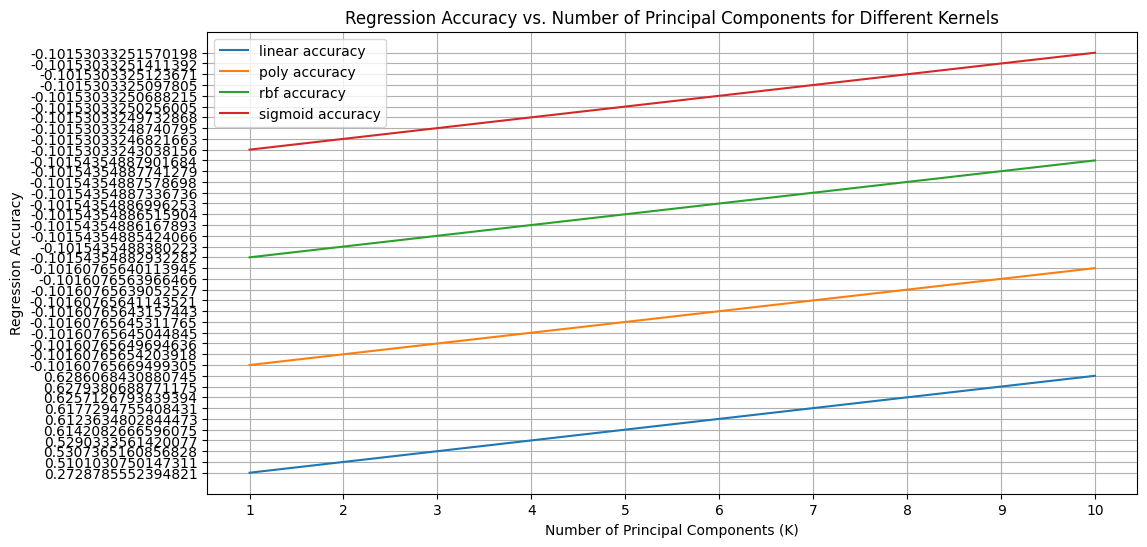

In [8]:

K_values = range(1, 11)  # Set the range of K values to consider
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # List of kernel functions to try
results = []

# Loop through different values of K and kernel functions
for K in K_values:
    pca = PCA(n_components=K)
    X_pca = pca.fit_transform(X)  # Transform your data using PCA

    for kernel in kernels:
        if kernel == 'linear':
            clf = LinearRegression()
        else:
            clf = SVR(kernel=kernel)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

        # Train the SVR or Linear Regression model
        clf.fit(X_train, y_train)

        # Predict and evaluate the model
        y_pred = clf.predict(X_test)
        if kernel == 'linear':
            mse = mean_squared_error(y_test, y_pred)
            accuracy = 1 - (mse / np.var(y_test))
        else:
            accuracy = clf.score(X_test, y_test)

        results.append((K, kernel, accuracy))

# Visualize the results
results = np.array(results)
plt.figure(figsize=(12, 6))

for kernel in kernels:
    subset = results[results[:, 1] == kernel]
    plt.plot(subset[:, 0], subset[:, 2], label=f'{kernel} accuracy')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Regression Accuracy')
plt.legend()
plt.grid()
plt.title('Regression Accuracy vs. Number of Principal Components for Different Kernels')
plt.show()